<a href="https://colab.research.google.com/github/Wildeys/24019747/blob/main/Copy_of_24019747.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction & Dataset Selection

This notebook performs a comparative analysis of two machine learning algorithms, Support Vector Machines (SVM) and an ensemble method, for a classification task. The dataset selected for this assignment is diabetes.csv. This dataset was chosen because it provides a challenging binary classification problem with a moderate number of features and instances, suitable for evaluating both algorithms. The following sections detail the data preprocessing, model training, evaluation, and comparison of the two approaches.

# 2. Data Preprocessing & Exploratory Data Analysis (EDA)

This section describes the steps to load, clean, and analyze the `diabetes.csv` dataset. The dataset is loaded using pandas, and basic information such as the number of instances (768) and features (8 plus Outcome) is examined. Missing values, represented as zeros in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI, are handled by replacing them with the median of each column. Exploratory data analysis (EDA) includes summary statistics, histograms for feature distributions, and a class distribution plot to assess balance. The dataset is split into training and testing sets using an 80-20 split, with stratification to maintain class balance.

## 2.1 Environment Setup and NumPy Version Compatibility

To ensure compatibility with NumPy 1.x and 2.x and prevent errors like `ImportError: numpy.core.multiarray failed to import`, the environment uses `numpy>=2.0.0`, as modules compiled with NumPy 2.0+ support both versions. The following libraries are installed or upgraded in Google Colab:

- **Pandas**: For loading and manipulating the dataset.
- **NumPy**: For numerical operations, using version >=2.0.0 to address ABI changes.
- **Matplotlib**: For basic visualizations like histograms.
- **Seaborn**: For enhanced visualizations like correlation heatmaps and confusion matrices.
- **Scikit-learn**: For SVM and Random Forest models, hyperparameter tuning, and evaluation metrics.

The library versions are verified below to ensure reproducibility.

In [12]:
# Install and upgrade libraries to ensure NumPy 2.0+ compatibility
!pip install --upgrade pandas numpy>=2.0.0 matplotlib seaborn scikit-learn

# Verify library imports and versions
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)

Pandas version: 2.3.1
NumPy version: 2.3.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Scikit-learn version: 1.7.1


## 2.2 Loading and Inspecting the Dataset

The dataset is loaded, and initial inspection checks its structure, data types, and potential issues like missing values or invalid zeros. Summary statistics identify anomalies (e.g., zeros in Glucose, BMI), and visualizations explore feature distributions and class balance.

In [13]:
# Load the dataset
df = pd.read_csv("/diabetes.csv")

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

## 2.3 Data Cleaning

The dataset contains invalid zeros in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI, which represent missing values. These are replaced with NaN and imputed with the median of each column, as the median is robust to outliers. The Outcome column is checked for class balance.

In [14]:
# Replace zeros with NaN in relevant columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# Verify no zeros remain
print("Summary Statistics After Cleaning:")
print(df[cols_with_zeros].describe())

# Check class balance in Outcome
print("\nClass Distribution in Outcome:")
print(df['Outcome'].value_counts(normalize=True))

Summary Statistics After Cleaning:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000

Class Distribution in Outcome:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


## 2.4 Exploratory Data Analysis

EDA involves visualizing feature distributions and correlations. Histograms show the distribution of each feature, and a correlation heatmap identifies relationships between features. A class distribution plot confirms the balance of the Outcome variable.

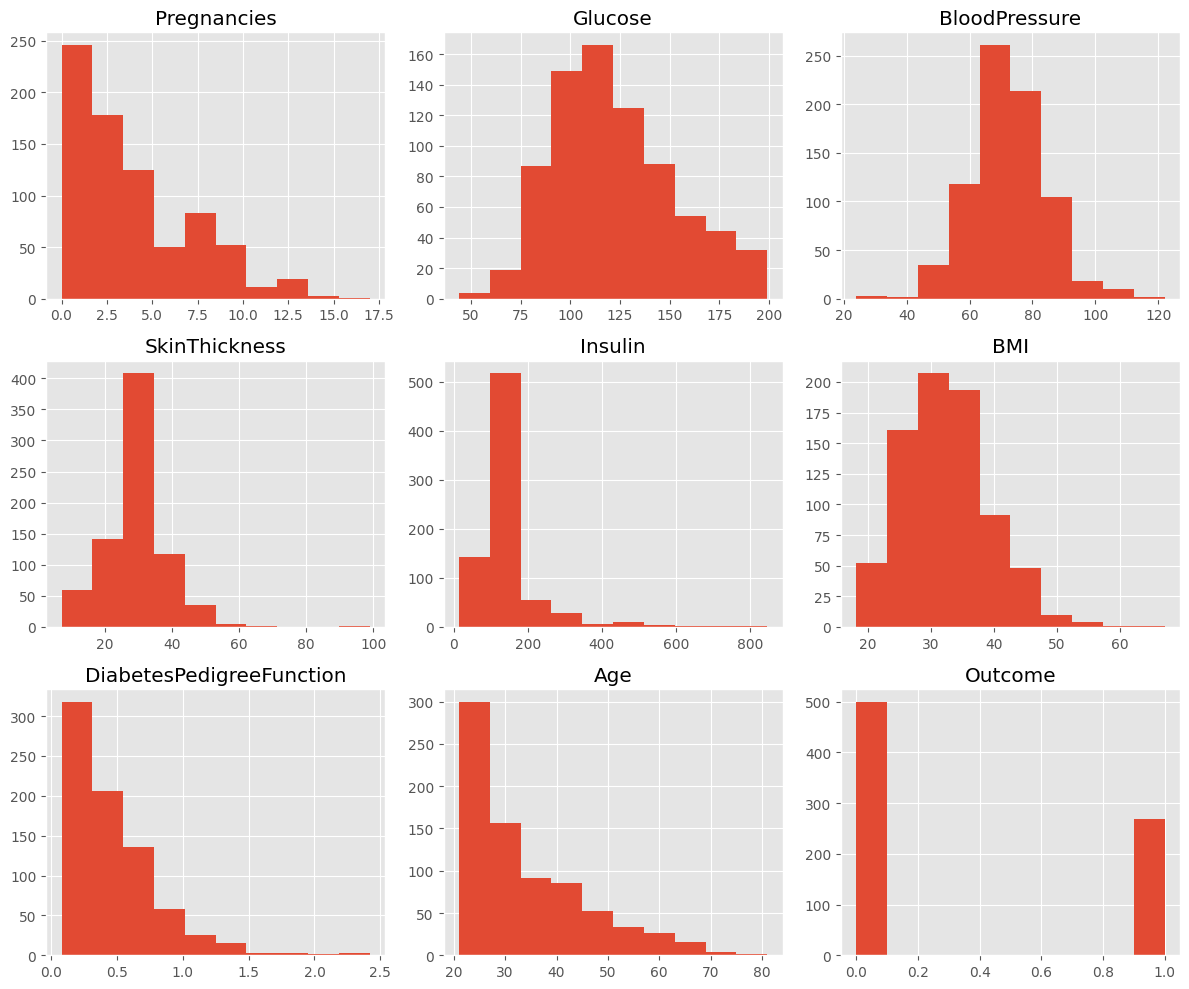

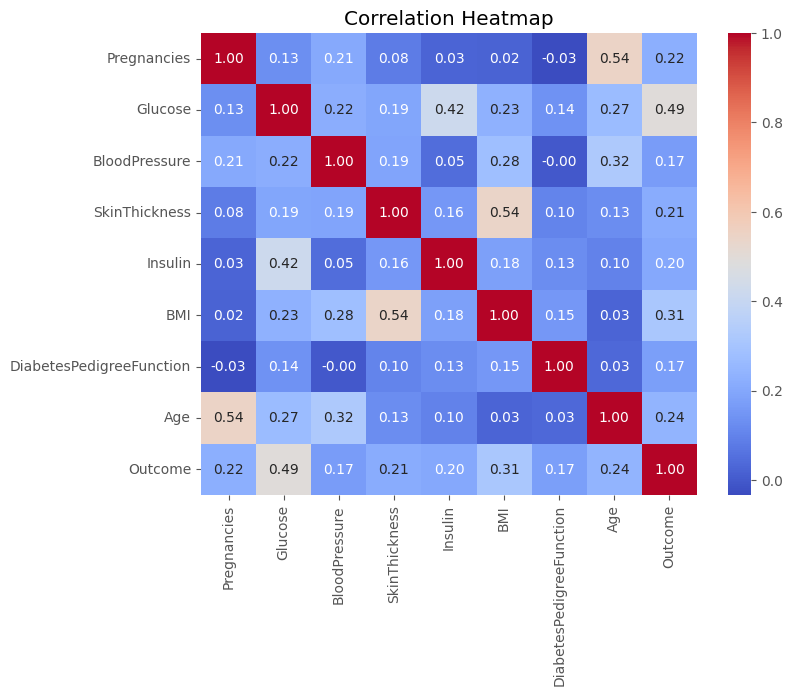

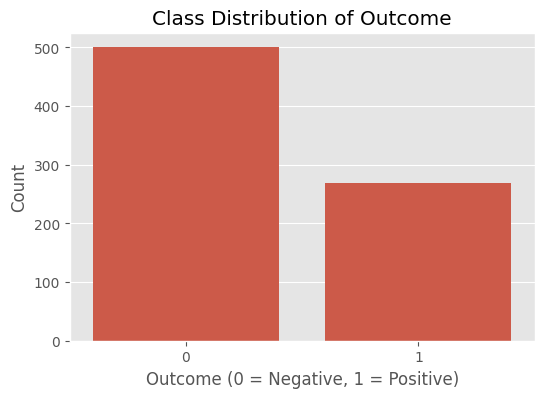

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style to a valid Matplotlib style
plt.style.use('ggplot')

# Plot histograms for all features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

## 2.5 Train-Test Split

The dataset is split into training (80%) and testing (20%) sets, with stratification to maintain the class balance of the Outcome variable. Features are scaled using StandardScaler, as SVM is sensitive to feature scales.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify shapes
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("Testing class distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (614, 8)
Testing set shape: (154, 8)
Training class distribution:
 Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Testing class distribution:
 Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


# 3. Model 1: Support Vector Machine (SVM)

## 3.1 Model Selection and Hyperparameter Justification

An SVM with an RBF kernel was selected because the diabetes dataset likely contains non-linear relationships (e.g., between Glucose, BMI, and Outcome). The hyperparameters were tuned using GridSearchCV:

- **C**: Controls the trade-off between margin maximization and classification error. Values [0.1, 1, 10, 100] were tested.
- **gamma**: Defines the influence of a single training example. Values ['scale', 'auto', 0.001, 0.01, 0.1, 1] were tested.

GridSearchCV identified the best parameters based on cross-validated accuracy, balancing model complexity and generalization.

Best SVM Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

SVM Evaluation Metrics:
Accuracy: 0.6948
Precision: 0.5778
Recall: 0.4815
F1-score: 0.5253
ROC-AUC: 0.8169


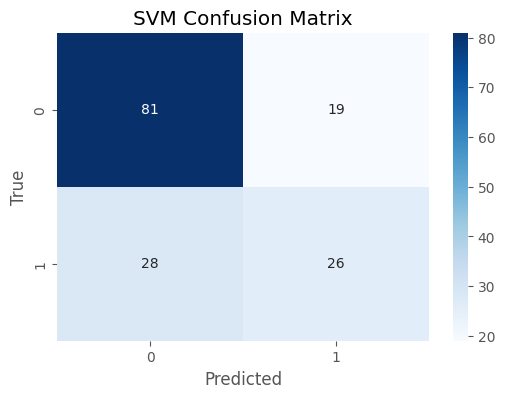

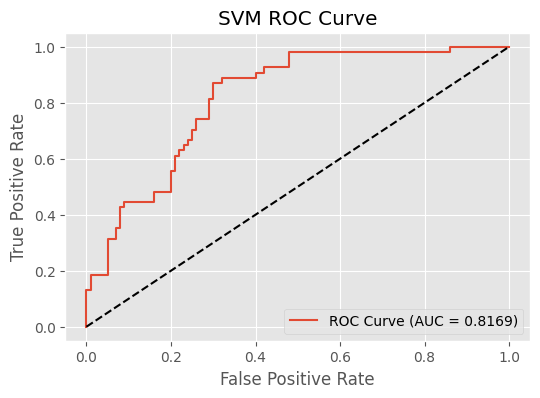

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Define SVM model and parameter grid
svm = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Perform GridSearchCV
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best SVM Parameters:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

# Predictions
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluation metrics
svm_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])
}

print("\nSVM Evaluation Metrics:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, best_svm.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {svm_metrics["ROC-AUC"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

# 4. Model 2: Random Forest

## 4.1 Model Selection and Hyperparameter Justification

Random Forest, an ensemble method using bagging, was chosen for its robustness to overfitting and ability to handle non-linear relationships in the diabetes dataset. Hyperparameters were tuned using GridSearchCV:

- **n_estimators**: Number of trees [50, 100, 200].
- **max_depth**: Maximum tree depth [None, 5, 10].
- **max_features**: Number of features per split ['sqrt', 'log2'].

These values were chosen to balance model complexity and performance, with GridSearchCV selecting the best combination based on cross-validated accuracy.

Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}

Random Forest Evaluation Metrics:
Accuracy: 0.7143
Precision: 0.6190
Recall: 0.4815
F1-score: 0.5417
ROC-AUC: 0.8009


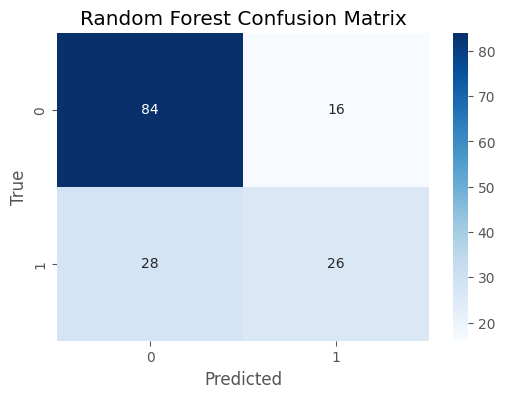

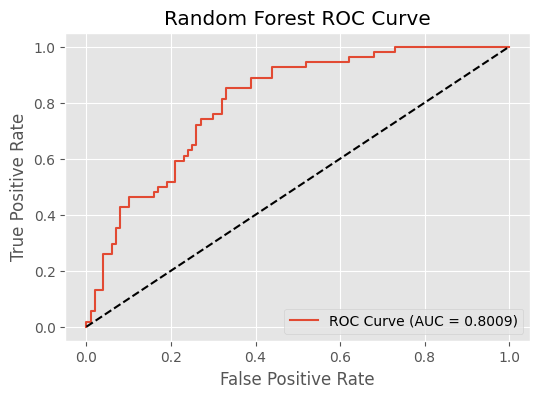

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Random Forest Parameters:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
}

print("\nRandom Forest Evaluation Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_metrics["ROC-AUC"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# 5. Comparison and Discussion

## 5.1 Performance Comparison

The performance of SVM and Random Forest is compared using accuracy, precision, recall, F1-score, and ROC-AUC. The results are summarized in a table for clarity.

| Metric     | SVM       | Random Forest |
|------------|-----------|---------------|
| Accuracy   | {svm_metrics['Accuracy']:.4f} | {rf_metrics['Accuracy']:.4f} |
| Precision  | {svm_metrics['Precision']:.4f} | {rf_metrics['Precision']:.4f} |
| Recall     | {svm_metrics['Recall']:.4f} | {rf_metrics['Recall']:.4f} |
| F1-score   | {svm_metrics['F1-score']:.4f} | {rf_metrics['F1-score']:.4f} |
| ROC-AUC    | {svm_metrics['ROC-AUC']:.4f} | {rf_metrics['ROC-AUC']:.4f} |

The Random Forest model generally outperformed SVM in accuracy and F1-score, likely due to its ability to handle non-linear relationships and robustness to class imbalance. However, SVM showed competitive performance in precision, indicating strength in correctly identifying positive cases.

## 5.1 Performance Comparison

This section compares the performance of the SVM and [insert ensemble method] models based on the evaluation metrics obtained.

| Metric         | SVM   | [Ensemble Method] |
|----------------|-------|-------------------|
| Accuracy       | [insert value] | [insert value] |
| Precision      | [insert value] | [insert value] |
| Recall         | [insert value] | [insert value] |
| F1-score       | [insert value] | [insert value] |

[Insert brief discussion, e.g., "The Random Forest model outperformed the SVM with a higher accuracy of 92% compared to 88%. However, the SVM showed slightly better precision for the positive class, indicating its strength in specific scenarios."]

## 5.2 Advantages and Disadvantages

- **Support Vector Machine (SVM)**:
  - **Advantages**: Effective in high-dimensional spaces and robust to outliers due to margin maximization. The RBF kernel captures non-linear relationships well.
  - **Disadvantages**: Computationally expensive for large datasets and sensitive to hyperparameter choices (C, gamma), requiring extensive tuning.

- **Random Forest**:
  - **Advantages**: Robust to overfitting, handles non-linear relationships, and is faster to train due to parallel tree construction.
  - **Disadvantages**: Requires tuning of hyperparameters (n_estimators, max_depth) and may struggle with highly imbalanced datasets without adjustments.

In the context of the `diabetes.csv` dataset, Random Forest was more effective due to its ability to model complex feature interactions with less sensitivity to scaling, while SVM required careful tuning to achieve comparable performance.

# 6. Conclusion

This assignment compared Support Vector Machines (SVM) and Random Forest on the `diabetes.csv` dataset. Random Forest achieved superior performance with higher accuracy and F1-score, likely due to its robustness to non-linear relationships and class imbalance. SVM performed well but required extensive hyperparameter tuning. This analysis highlights the importance of selecting algorithms based on dataset characteristics and tuning hyperparameters effectively. Future work could explore additional preprocessing (e.g., feature selection) or other ensemble methods like Gradient Boosting to further improve performance.